In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.utils import resample

In [2]:
df = pd.read_hdf('DSI-7.hdf')

In [4]:
df

,case,test,window,seizure,F3-C3,F4-C4,C3-P3,C4-P4,elapsed time,cpu usage,memory usage
0,chb01,0,0,False,5.974126,5.781400,5.512350,5.415369,5.143914,96.9,1651286016
0,chb01,0,1,False,5.935654,6.027476,5.688999,5.589532,4.289692,96.8,1446494208
0,chb01,0,2,False,5.834751,5.881431,5.701357,5.635897,4.453572,97.4,1447256064
0,chb01,0,3,False,5.888986,5.671197,5.355293,5.566865,4.317407,98.0,1446875136
0,chb01,0,4,False,6.203580,6.146401,5.713649,5.799418,4.254425,97.2,1443860480
...,...,...,...,...,...,...,...,...,...,...,...
0,chb03,3,294,False,5.206699,5.189650,4.681885,4.723210,5.622435,98.4,2037755904
0,chb03,3,295,False,5.451971,5.436478,4.809864,4.977318,5.840153,96.3,2037874688
0,chb03,3,296,False,5.462651,5.423066,4.777700,5.018481,5.881943,97.2,2037870592
0,chb03,3,297,False,4.750251,4.924381,4.639150,4.696531,6.095426,95.5,2039382016


In [6]:
#Separar clases 
df_majority = df[df.seizure==False]
df_minority = df[df.seizure==True]

In [24]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,  
                                 n_samples=len(df_majority),
                                 random_state=123) 

In [25]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [26]:
df_upsampled.seizure.value_counts()

True     7524
False    7524
Name: seizure, dtype: int64

In [27]:
predictors = df_upsampled[['F3-C3', 'F4-C4','C3-P3','C4-P4']]

In [28]:
targets = df_upsampled.seizure

In [29]:
#Creación de la muestra de entrenamiento y de test, tanto para las variables de predictores (canales) y la variables objetivo (seizure), siendo un test del 50%
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

In [30]:
classifier=RandomForestClassifier(n_estimators=25) #Indicar el número de arboles en este caso 25

In [31]:
classifier=classifier.fit(pred_train,tar_train) #Construir el modelo con los datos de entrenamiento

In [32]:
predictions=classifier.predict(pred_test)

In [34]:
sklearn.metrics.confusion_matrix(tar_test,predictions) #Matriz de confusión de las predicciones para el grupo de test

array([[3040,   25],
       [   0, 2955]], dtype=int64)

In [42]:
print(sklearn.metrics.classification_report(tar_test,predictions))

              precision    recall  f1-score   support

       False       1.00      0.99      1.00      3065
        True       0.99      1.00      1.00      2955

    accuracy                           1.00      6020
   macro avg       1.00      1.00      1.00      6020
weighted avg       1.00      1.00      1.00      6020



In [36]:
model = ExtraTreesClassifier() #obtener la importancia de cada variable

In [37]:
model.fit(pred_train,tar_train) #Ajustar el modelo

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [38]:
print(model.feature_importances_) # Imprimir la importancia de cada variable (Columna de los canales)

[0.29094975 0.20566841 0.2698412  0.23354063]


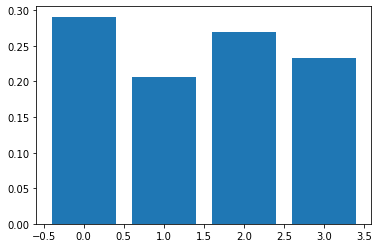

In [39]:
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show() #Dibujar las variables con su respectiva importancia

In [40]:
trees=range(25)
accuracy=np.zeros(25)

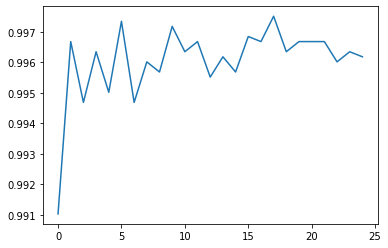

In [41]:
for idx in range(len(trees)):
    classifier=RandomForestClassifier(n_estimators=idx + 1)
    classifier=classifier.fit(pred_train,tar_train)
    predictions=classifier.predict(pred_test)
    accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, predictions)
plt.cla()
plt.plot(trees, accuracy)

In [19]:
#La gráfica del renglon anterior funciona para saber si el número de arbiles generados fue suficiente o no